# Batch Normalization


A problem occuring when training deep neural networks is internal covariate shift; When a network learns its covariates it uses a optimization algorithm on a given loss function. When the covariates in one layer then is changed by this method it affects the other layers, and it needs to relearn its parameters to account for this shift in covariates.<a href = "https://arxiv.org/pdf/1502.03167v3.pdf"> **Sergey Ioffe and Christian Szegedy**</a> proposed a method to account for this *internal covariate shift*, called *batch normazation*.

We will in this numerical example present the algorithm of batch normalization and how it is implemented in a neural network, and show some results from the initial paper. We will also create our own code that will apply this algorithm to mini-batches on a given kernel and activiation function. 



### Internal Covariance Shift

Given a loss function the covariates of a network $\theta$ is found from a optmization method 
\begin{equation*}
\theta = \underset{\theta}{\mathrm{argmin}}\frac{1}{N}\sum\limits_{i=1}^N \mathcal{l}(x_i,\theta),
\end{equation*}
where $x_i$ is the input data that the network is trained on and $\mathcal{l}$ is the loss function that is to be minimized.

Lets say we have a network of two layers with each a activation  function $\alpha_1$ and $\alpha_2$ respectivly. We have that the loss function is given by 

\begin{equation*}
\mathcal{l} = \alpha_2\{\alpha_1\{x,\theta_1\},\theta\},
\end{equation*}
where $\theta_1$ and $\theta_2$ is the covariates of each layer, which are to be learned. This means that we have values outputed from the first layer $z = \alpha_1\{x,\theta_1\}$, that will change when the parameters $\theta_1$ are learned/changed. This means that the second layer, $ y = \alpha_2\{z,\theta_2\}$, will be affected by this distributional change in the outputs from the first layer and the network will learn slower than if the second layer wasn't affected by this change. Here we can apply batch normalization to the outputs of the first layer to fixate the inputs to the second layer such that it is not affected by the training of other layers. 



### Normalization

Normalizing each layer using the whole dataset is very costly and is not differentiable everywhere. To account for this batch-normalization has been implemented using two similifications. The first one being that normalization is done along the different dimentions of the layers. Which means for the input normalization is happening for red, green and blue values, and within the network is would be normalized for the different filters. Which means that given a layer of dimension $d$, the input $\mathbf{x} = (\mathbf{x}^{(1)},\mathbf{x}^{(2)},\dots,\mathbf{x}^{(d)})$ would be normalized by
\begin{equation*}
\hat{\mathbf{x}} = \frac{\mathbf{x}^{(k)} - \mathrm{E}[\mathbf{x}^{(k)}]}{\sqrt{\mathrm{Var}[\mathbf{x}^{(k)}]}}
\end{equation*}

The batch-normalization must be a transformation that can represent the identity transform. This will account for the issue of normalization not being in the nonlinear domain of some activation functions (e.g. Sigmoid). To do this scale and shift parameters are introduced to the transformations that are learned along with the other model parameters. This results in the input to the layer in the neural network
\begin{equation*}
\mathbf{y}^{(k)} = \mathbf{x}^{(k)}\gamma^{(k)} + \beta^{(k)},
\end{equation*}
which means that the distribution of the input lie in the distribution $\mathcal{N}[\beta,\gamma]$. Also of note here is that the transformation  would represent the identity transform if the $\beta^{(k)} = \mathrm{E}[\mathbf{x}^{(k)}]$ and $\gamma^{(k)} = \mathrm{Var}[\mathbf{x}^{(k)}]$.

A second simplification is to use the mean and variance of the batch for normalization. This makes the normalization able to participate fully in the backpropagation. We split the data into mini-batches $\mathcal{B}_i = \{x_1^{(k)},\dots,x_m\}^{(k)}$ of size $m$. Then the batch-normalization transformation becomes

\begin{equation*}
\mathrm{BN}:x_{1\dots m}^{(k)} \rightarrow \hat{x}_{1\dots m}^{(k)} \rightarrow y_{1\dots m}^{(k)},
\end{equation*}

which is summed up in the following algorithm which is the same algorithm included in the paper by <a href = "https://arxiv.org/pdf/1502.03167v3.pdf"> **Sergey Ioffe and Christian Szegedy**</a> .

\begin{equation*}
\boxed{\begin{array}{ll}
    \textbf{Input:} & \textrm{Values of x^{(k)} over a mini-batch:} \enspace \mathcal{B} = \{x_{1,\dots,m}\}^{(k)};\\
     & \textrm{Parameters to be learned:} \gamma^{(k)}, \beta^{(k)} \\ 
     \textbf{Output:} & \{y_i^{(k)} = \mathrm{BN}_{\gamma^{(k)},\beta^{(k)}}(x^{(k)}_i)\} \\
\end{array}\\
\begin{array}{lr}
    \enspace \mu_{\mathcal{B}^{(k)}} = \frac{1}{m}\sum\limits_{i=1}^m x_i^{(k)} & \textrm{mini-batch mean} \\
    \enspace \sigma_{\mathcal{B}^{(k)}}^2 = \frac{1}{m}\sum\limits_{i=1}^m (x_i^{(k)} - \mu_{\mathcal{B}^{(k)}})^2 & \textrm{mini-batch variance}\\
    \enspace \hat{x}_i^{(k)} = \frac{x_i^{(k)} - \mu_{\mathcal{B}^{(k)}}}{\sqrt{\sigma_{\mathcal{B}^{(k)}}^2 + \epsilon}} & \textrm{normalize} \\ 
    \enspace y_i^{(k)} = \gamma^{(k)} \hat{x}_i^{(k)} + \beta^{(k)} \equiv \mathrm{BN}_{\gamma^{(k)},\beta^{(k)}}(x_i^{(k)}) & \textrm{scale and shift}
\end{array}}\\
\textbf{Algorithm 1:}\textrm{ Batch Normalizing Transform, applied to} \\ \textrm{activation } x \textrm{ over a mini-batch.}
\end{equation*}

The batch-normalization can be viewed as a sub-network within the bigger network. The $\beta$ and $\gamma$ parameters are learned through the training and the gradient of the loss $\mathcal{l}$ of these parameters are found with the equations


\begin{equation*}
\begin{array}{rcl}
    \frac{\partial\mathcal{l}}{\partial\hat{x}_i} & = & \frac{\partial\mathcal{l}}{\partial y_i} \gamma \\
    \frac{\partial\mathcal{l}}{\partial\sigma_\mathcal{B}^2} & = & \sum_{i = 1}^m \frac{\partial\mathcal{l}}{\partial\hat{x}_i}\frac{-1}{2}(\sigma_\mathcal{B}^2 + \epsilon)^{-3/2} \\
    \frac{\partial\mathcal{l}}{\partial\mu_\mathcal{B}} & = & \left( \sum_{i = 1}^m \frac{\partial\mathcal{l}}{\partial\hat{x}_i} \frac{-1}{\sqrt{\sigma_\mathcal{B}^2 + \epsilon}}\right) + \frac{\partial\mathcal{l}}{\partial\sigma_\mathcal{B}^2} \frac{\sum_{i = 1}^m -2(x_i - \mu_\mathcal{B})}{m} \\
    \frac{\partial\mathcal{l}}{\partial x_i} & = & \frac{\partial\mathcal{l}}{\partial\hat{x}_i} \frac{1}{\sqrt{\sigma_\mathcal{B}^2 + \epsilon}} + \frac{\partial\mathcal{l}}{\partial\sigma_\mathcal{B}^2}\frac{2(x_i - \mu_\mathcal{B})}{m} + \frac{\partial\mathcal{l}}{\partial\mu_\mathcal{B}}\frac{1}{m} \\
    \frac{\partial\mathcal{l}}{\partial\gamma} & = & \sum_{i = 1}^m \frac{\partial\mathcal{l}}{\partial y_i} \hat{x}_i \\
    \frac{\partial\mathcal{l}}{\partial \beta} & = & \sum_{i = 1}^m \frac{\partial\mathcal{l}}{\partial y_i}.
\end{array}
\end{equation*}

The joint distribution of the $\hat{x}$ are assumed to change during training, but with the transformation the distributional change won't be as large as prior to the batch-normalization and thus result in faster training of the neural network. It is important to note that during training a running average and running variance is used to calculate the mini-batch statistics. This will stabalize the mini-batch statistics and the trainable parameters in the sub-network. This running statistics is then applied during validation/testing.

<a href = "https://arxiv.org/pdf/1502.03167v3.pdf"> **Sergey Ioffe and Christian Szegedy**</a> created a network with three fully-connected layers and trained on the **MNIST** dataset and they presented their results with the figure shown below. 

![Normalization](figures/bn-trained-network.png)

**a)** is the accuracy of the network during training. **b)** and **c)** shows the distributional change of one layer during training in percentiles. 



## Visualization of Internal Covariance shift

We will now create a toy network of three fully connected layers. The kernel applied to the first layer is just a representation of a optimization where we devide by $1/2$ in every epoch. Representing the "optimal" solution of zero matrix kernel for every channel.

First we import the require packages.


In [422]:
import os # to get directories
from PIL import Image # to open images and resize
import matplotlib.pyplot as plt # plotting
import numpy as np 
import cv2 # to create distributions of rgb
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 15, 25

The **load_batch()** function will load a batch from directory and resize it to the required size. 

In [423]:
def load_batch(batch_size,img_size,last_it):
    data_dir = '../numerical_examples/data/small/train/dogs/'
    data_files = os.listdir(data_dir)
    array = np.array(
        [
            np.array(Image.open(f'{data_dir}/{data_files[i]}').resize((img_size, img_size), Image.ANTIALIAS))
            for i
            in range(last_it,batch_size+last_it)
        ]
    )
    return array

The **batch_normalization2d()** will apply batch normalization to the network by **Algorithm 1**. The noise term is set to $\epsilon = 10^{-5}$.

In [424]:
def batch_normalization2d(array,gamma,beta,batch_size,batch_norm, eps=1e-5):
    assert array.ndim == batch_size
    if batch_norm:
        mean = array.mean(axis=(0,1,2))
        std = array.std(axis=(0,1,2))
        array = (array - mean)/np.sqrt(std**2 + eps)
        array = array*gamma + beta
    return array

The **visualize_batch()** function will plot the distribution of the different channels for a entire batch.

In [425]:
def visualize_batch(array,batch_num,epoch):
    colors = ("b", "g", "r")
    fig = plt.figure(figsize = (20,5))
    plt.title("Batch: {} ;  Epoch: {}".format(batch_num+1,epoch+1))
    plt.axis("off")
    for i, img in enumerate(array):
        img = np.float32(img)
        chans = cv2.split(img)
        features = []
        for (chan, color) in zip(chans, colors):
            hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
            features.extend(hist)
            ax = fig.add_subplot(1,4,i+1)
            ax.plot(hist, color = color)
            plt.xlim([0, 256])
    plt.pause(0.5)

The **output_layer()** function applies some simple kernel to the different channels. We simply chose a magnitude **move** that represent the scale at which each channel is changed. 

In [426]:
def output_layer(array,move,batch_size):
    assert array.ndim == batch_size
    array = array*move
    return array

The **network_flow()** functions controls the flow of the network. Which means every epoch of training and the iteration through batches. If we want batch_normalization to be used in the second layer of the network we set **batch_norm = True**. We have also fixed $\gamma = 10$ and $\beta = 14$ for simplicity, however generally in batch normalization these are trained.

In [432]:
def network_flow(img_size,batch_size,n_img,n_epochs,batch_norm = True):
    for epoch in range(n_epochs):
        num_batches = n_img//batch_size
        last_batch_num = 0
        gamma = 10
        beta = 14
        for i in range(num_batches):
            batch = load_batch(batch_size,img_size,last_batch_num)
            output_batch = output_layer(batch,1/(epoch+1),batch_size)
            normalized_batch = batch_normalization2d(output_batch,gamma,beta,batch_size,batch_norm)
            visualize_batch(normalized_batch,i,epoch)
            last_batch_num += batch_size
    return
    



We will now display what happens in a neural network when batch normalization is not used. We will use our toy network and pretend like the first layer is moving towards its optimum weights. Then we will look at the output of this layer and visualize how the different channel distributions are moved when being trained. We will "train" for three epochs with a batch size of 4 images from a dogs and cats dataset. Below a example image from this dataset is presented.

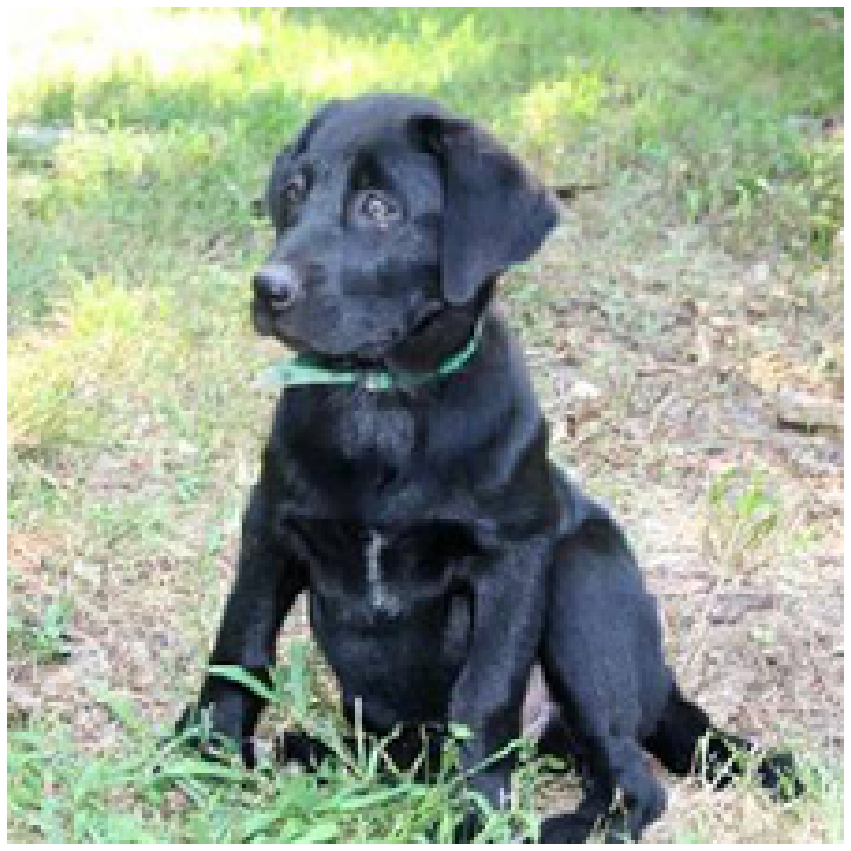

In [433]:
tmp_img = load_batch(4,224,0)
plt.imshow(tmp_img[0,:,:,:]);
plt.axis("off");

## Without Batch Normalization

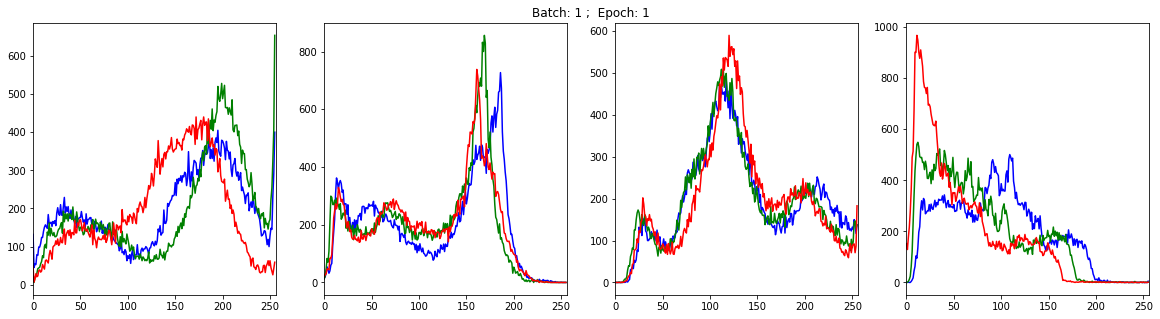

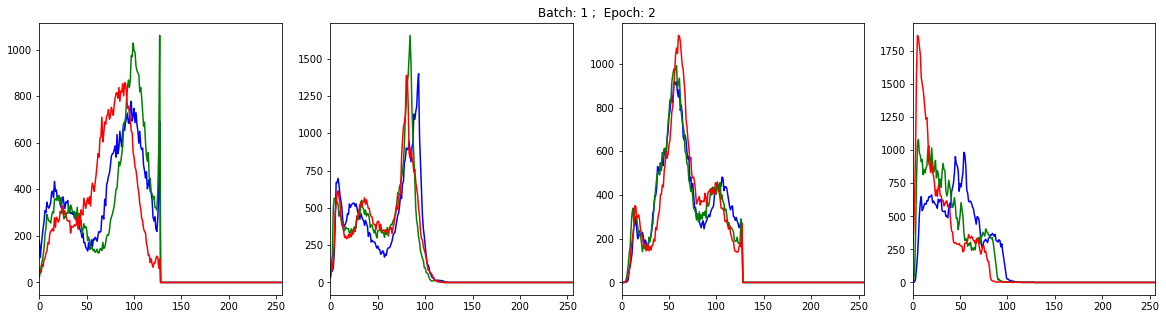

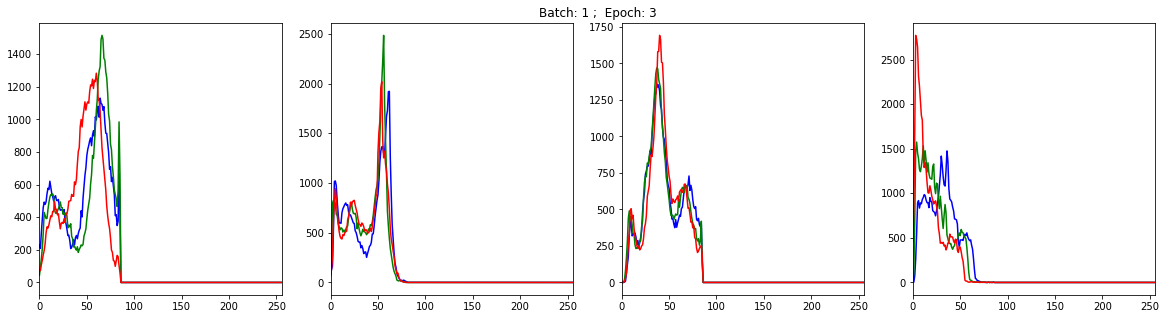

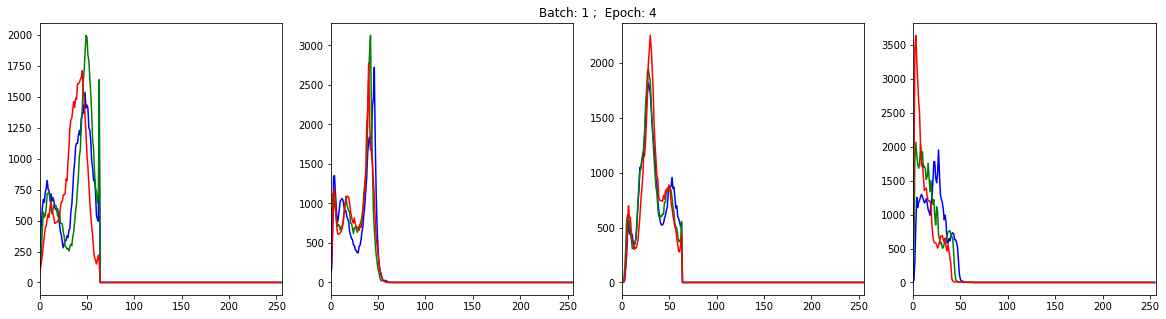

In [434]:
# one batch, three epochs, without bn
network_flow(img_size = 224,batch_size = 4,n_img = 4,n_epochs = 4, batch_norm = False)

As clearly visable above there is a internal covariance shift. 

## With Batch Normalization

Let's now try to apply batch normalization after the first layer. We will use $\gamma = 10$ and $\beta = 14$ as previously mentioned. As figure below clearly presents there is no distributional change in the ouput of the first layer, even thought the weights of the first layer is changing. 

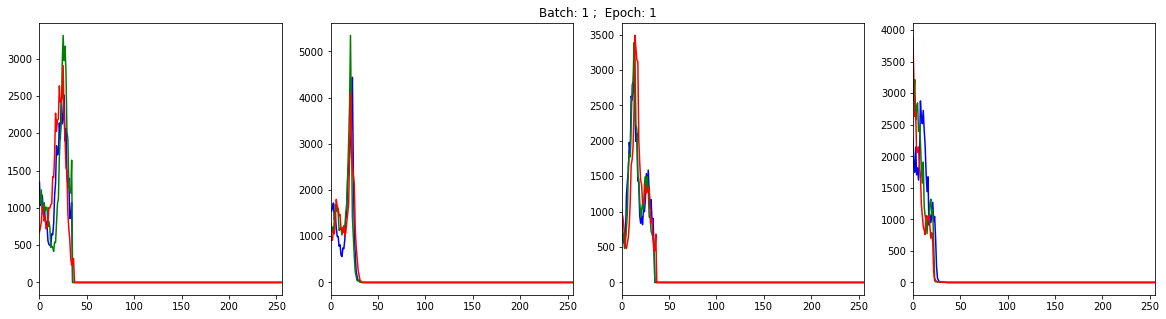

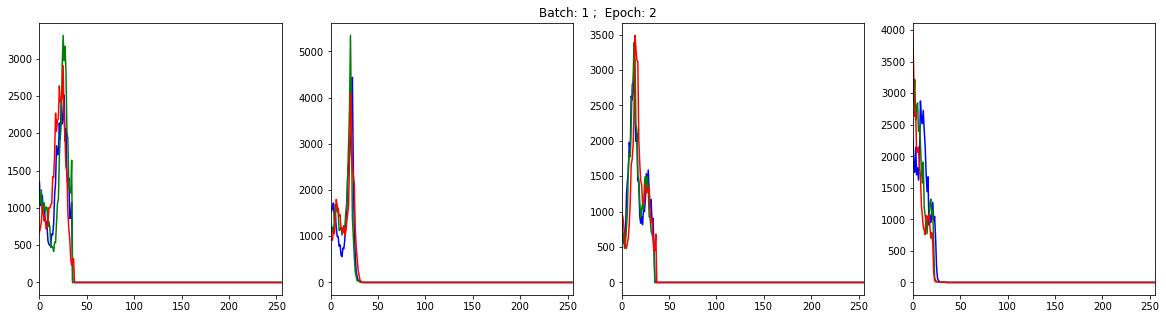

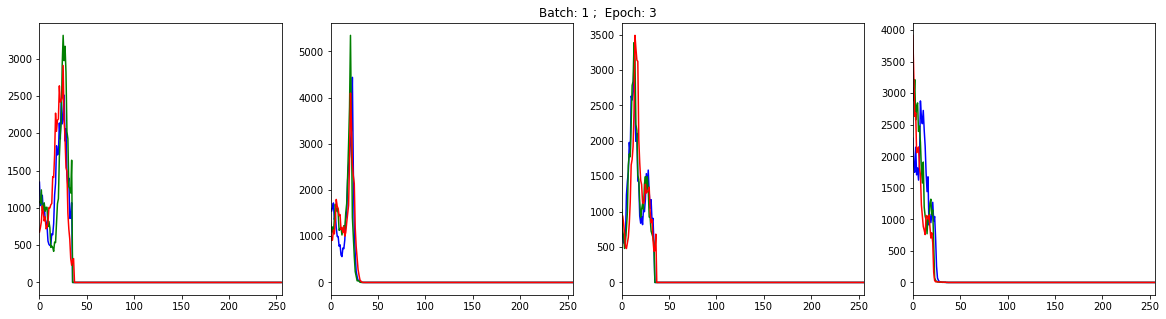

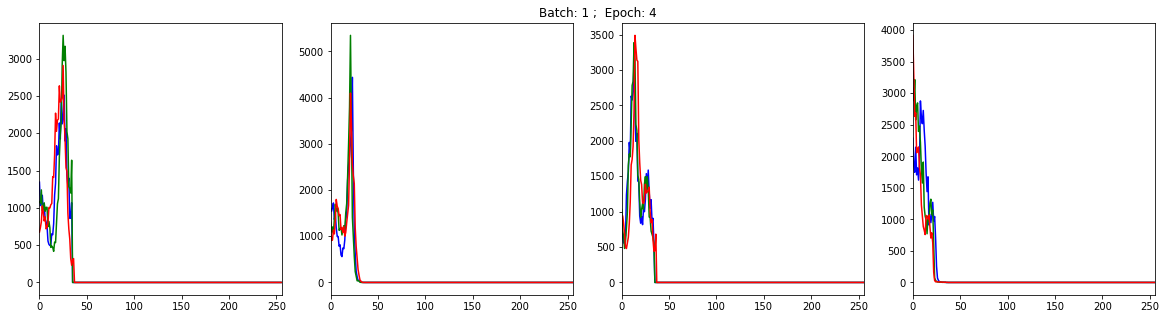

In [435]:
network_flow(img_size = 224,batch_size = 4,n_img = 4,n_epochs = 4,batch_norm=True)